In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import tree
import joblib
import warnings
from sklearn import metrics
import pickle


In [4]:

# Configurations
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("Customer Data.csv")


In [14]:
df.shape

(8950, 18)

In [6]:
#View the data
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [7]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
#Describe the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [22]:
#Find the duplicates
if df.duplicated().sum() > 0:
    print(f"Number of duplicate rows: {df.duplicated().sum()}")
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
#Percentage of Null Values
313/8950

0.034972067039106144

In [20]:
# Data Preprocessing
# Fill missing values with mean
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

In [21]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [30]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

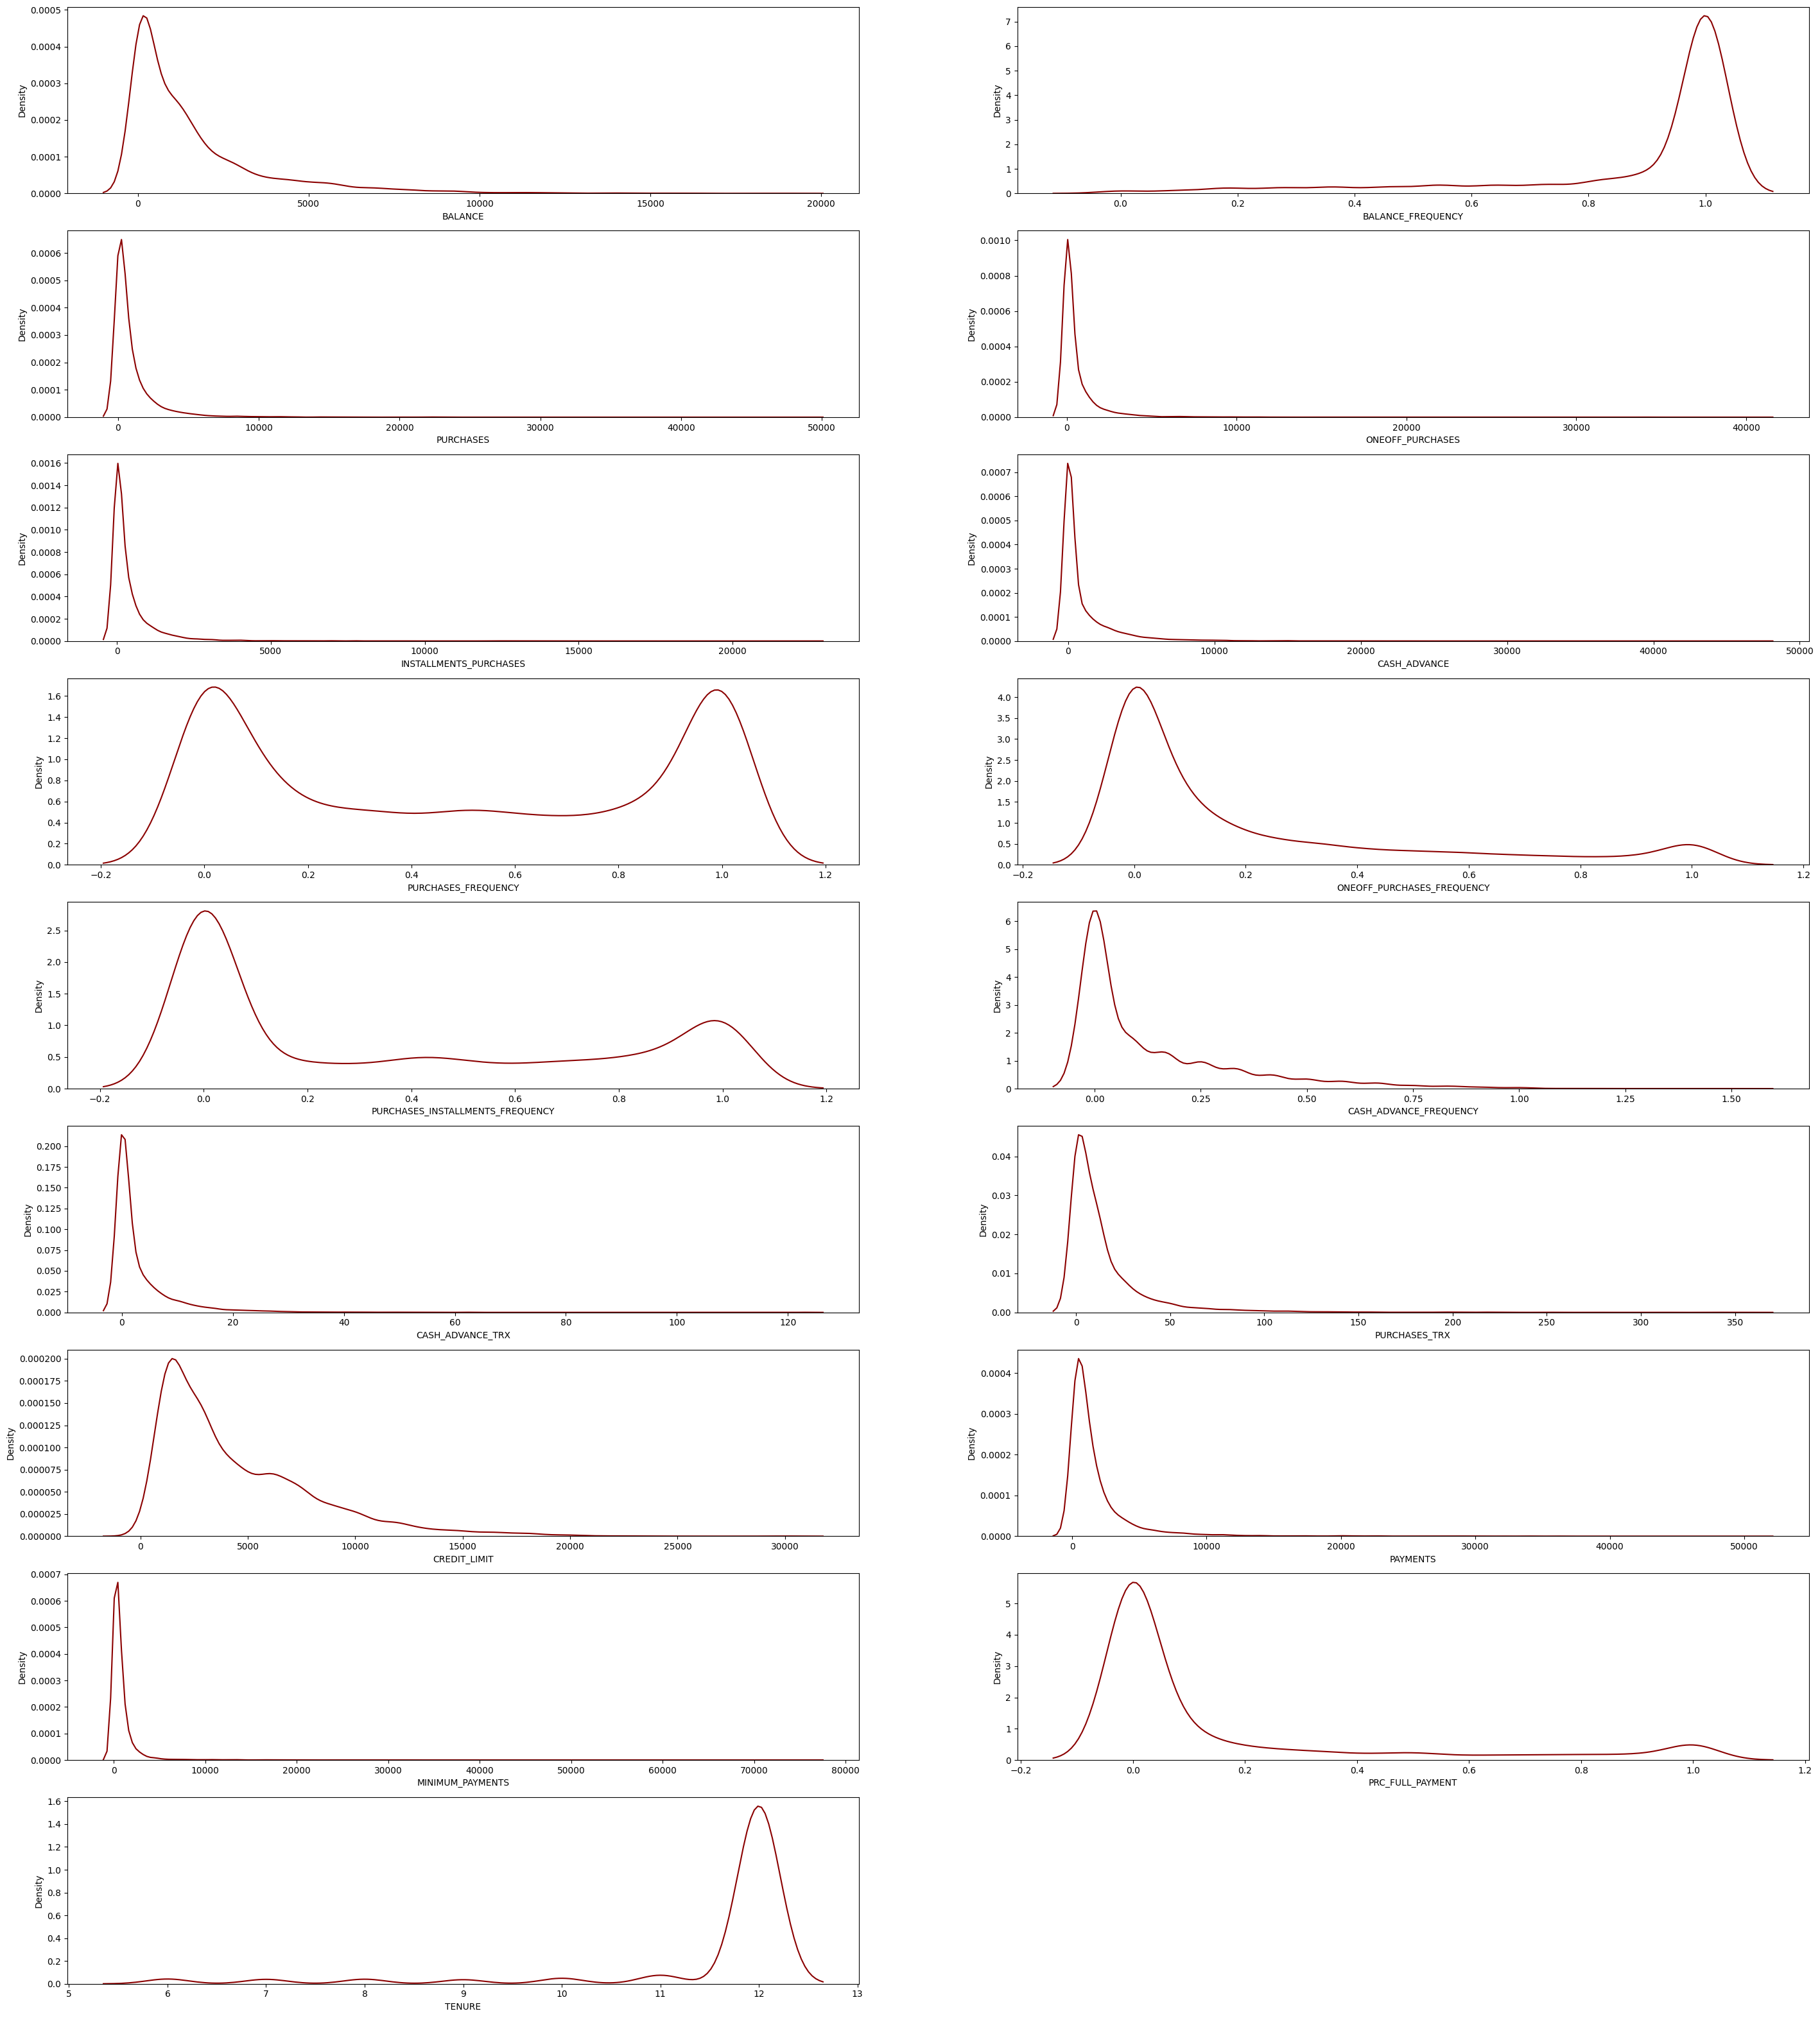

In [31]:
# Data Visualization
# Display the distribution of numerical features
plt.figure(figsize=(35,40))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax, color='darkred')
        plt.xlabel(col)
plt.show()

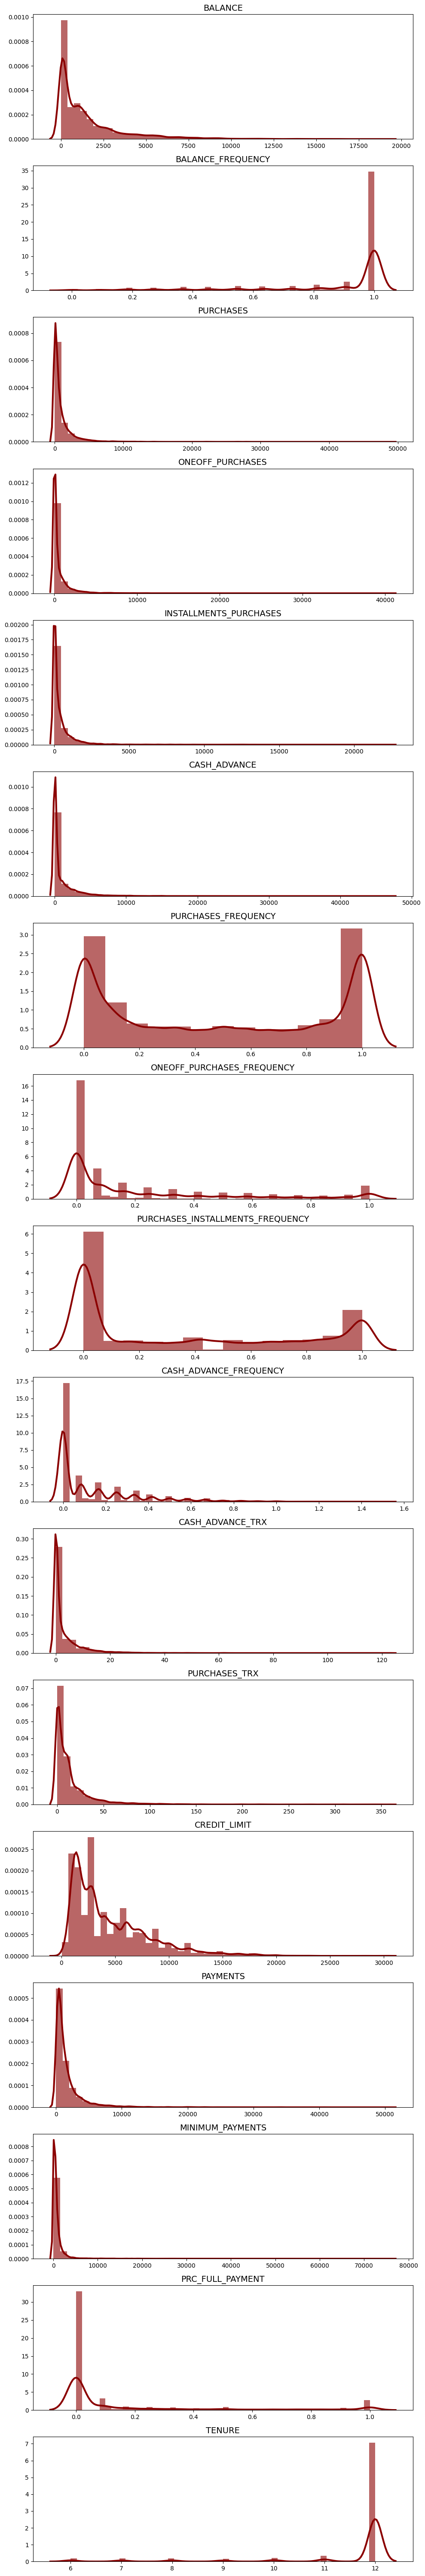

In [54]:
plt.figure(figsize=(10,60))

# Loop through each feature and plot its distribution
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],
                 kde_kws={'color':'darkred', 'bw': 0.1, 'lw':3, 'label':'KDE'},
                 hist_kws={'color':'darkred', 'alpha': 0.6})

    plt.title(df.columns[i], fontsize=14)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

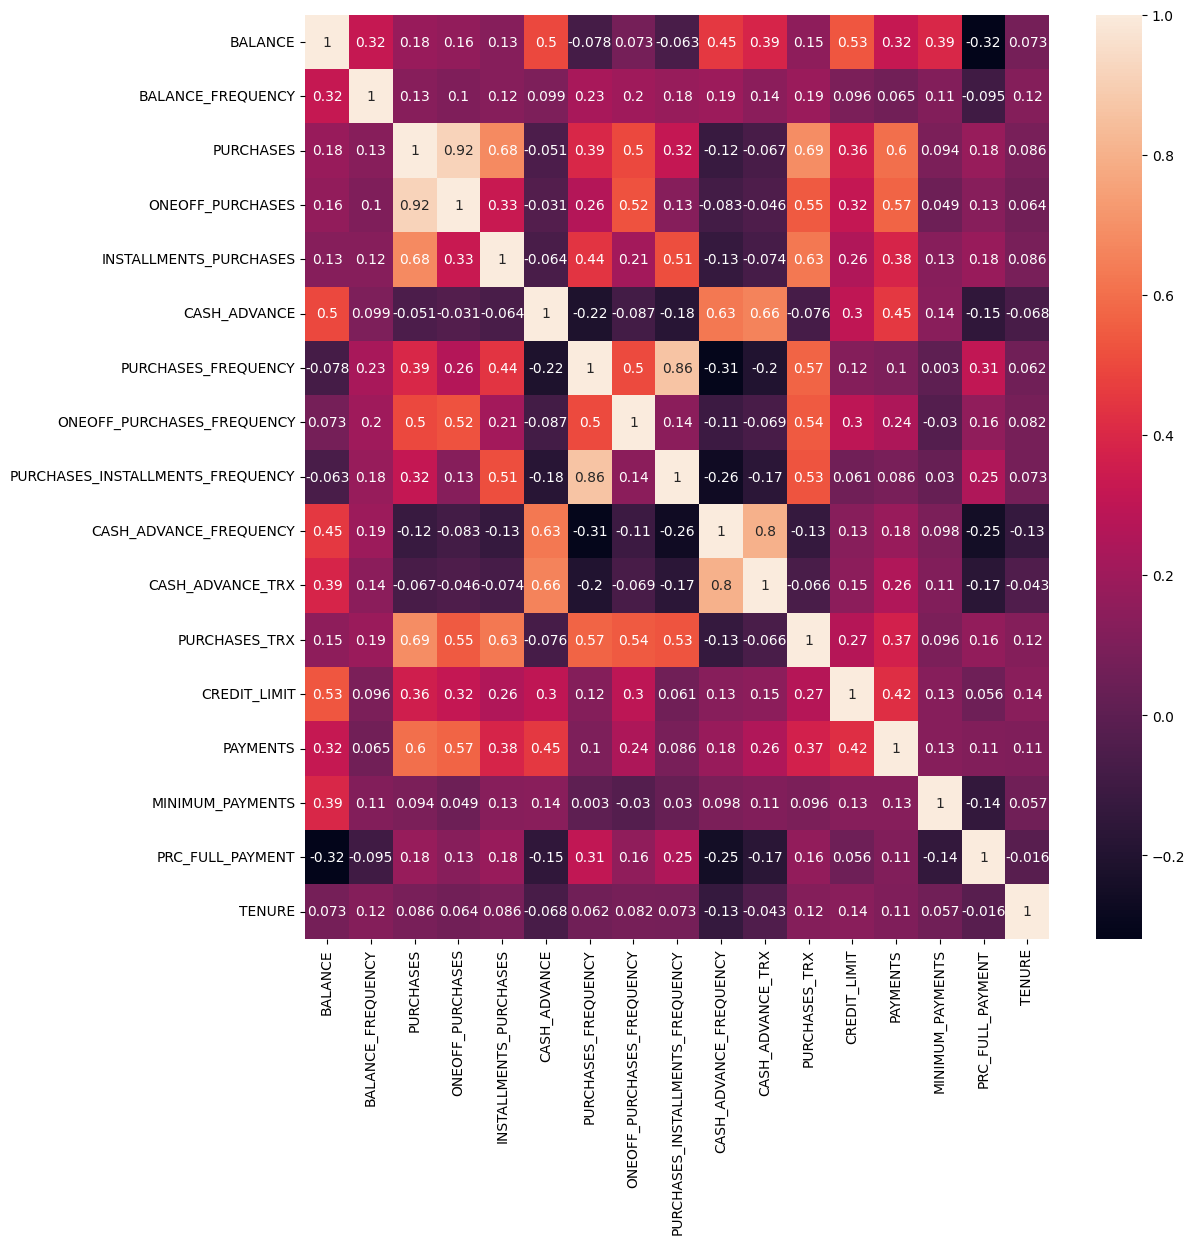

In [32]:
# Visualisation of Correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
# Feature Scaling and PCA
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1","PCA2"])
pca_df


,PCA1,PCA2
0,-1.682220,-1.076452
1,-1.138295,2.506473
2,0.969685,-0.383512
3,-0.873628,0.043164
4,-1.599434,-0.688582
...,...,...
8945,-0.359629,-2.016146
8946,-0.564369,-1.639125
8947,-0.926204,-1.810787
8948,-2.336552,-0.657969


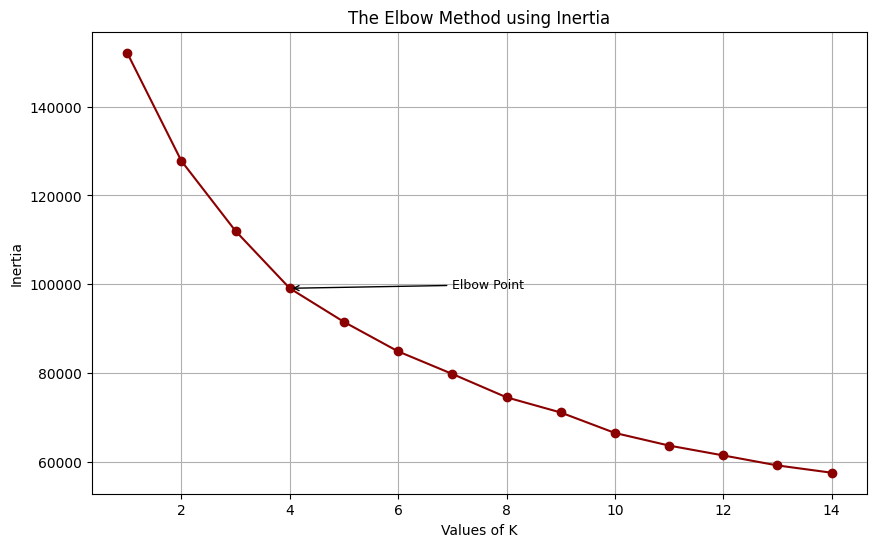

In [36]:
# KMeans Clustering
# Using the Elbow method to find the optimal number of clusters
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10,6))
plt.plot(range_val, inertia, '-o', color='darkred')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

# Adding an arrow annotation at the elbow point (change the elbow point if needed)
elbow_point = 4
plt.annotate('Elbow Point',
             xy=(elbow_point, inertia[elbow_point-1]),
             xytext=(elbow_point+3, inertia[elbow_point-1]+0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)

plt.grid(True)


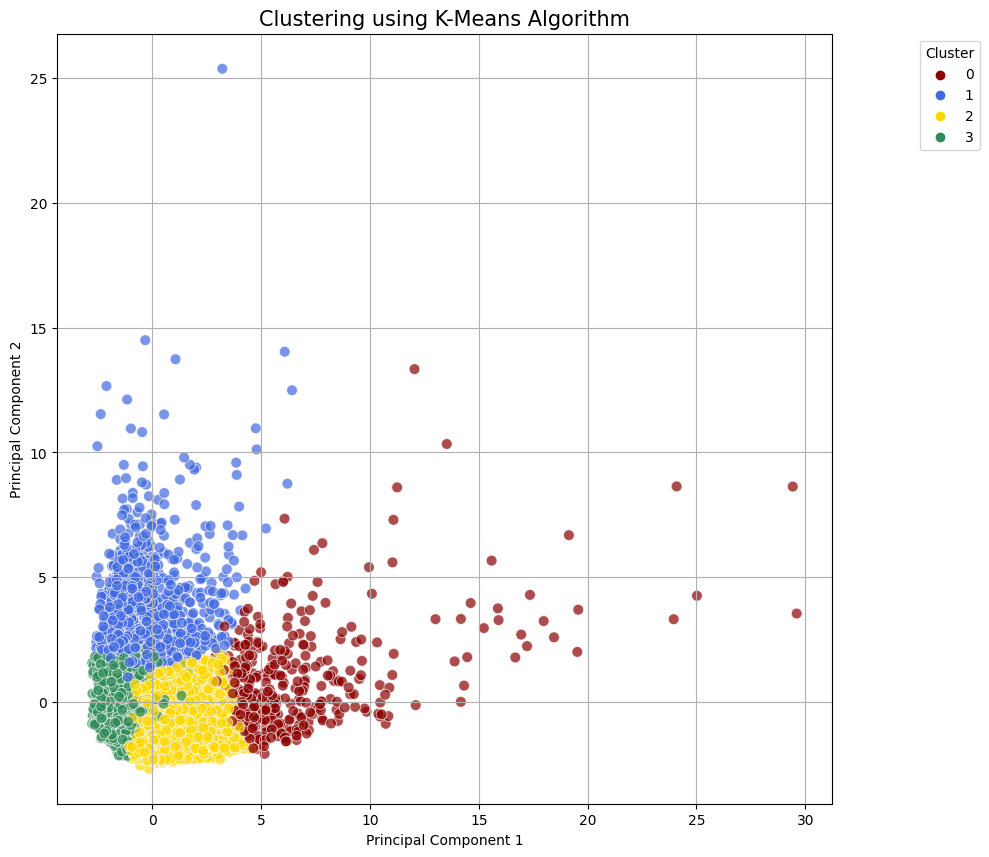

In [39]:

# Applying KMeans with the chosen cluster number (4 in this case)
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

# Visualization of clusters in PCA space
plt.figure(figsize=(10,10))
palette_colors = {
    0: 'darkred',
    1: 'royalblue',
    2: 'gold',
    3: 'seagreen'
}
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=palette_colors, s=60, edgecolor='w', alpha=0.7)
plt.title("Clustering using K-Means Algorithm", fontsize=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


In [41]:
# Find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=df.columns)

# Inverse transform the cluster centers to the original data space
cluster_centers_original = scalar.inverse_transform(cluster_centers)

# Convert to DataFrame for easier viewing
cluster_centers_df = pd.DataFrame(data=cluster_centers_original, columns=df.columns)
print("Cluster Centers in Original Data Space:")
display(cluster_centers_df)

# Create a target column "Cluster" for storing the cluster segment
df['Cluster'] = kmeans_model.labels_

# Segment the data based on clusters
clusters = {}
for i in range(4):
    clusters[f"cluster_{i}_df"] = df[df["Cluster"] == i]

# Display the first few rows of each cluster (as an example)
for key, value in clusters.items():
    print(f"First few rows of {key}:")
    display(value.head())
    print("\n")


Cluster Centers in Original Data Space:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
3,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429


First few rows of cluster_0_df:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
21,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,0
57,2386.330629,1.0,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,0
84,1935.362486,1.0,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,0
90,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,0




First few rows of cluster_1_df:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,1
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,1
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,1
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,1




First few rows of cluster_2_df:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,2
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,2
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,2
10,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,2
12,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,2




First few rows of cluster_3_df:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,3
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12,3
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.0,12,3


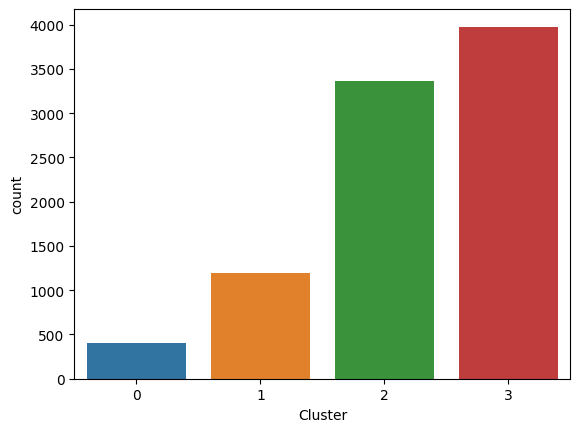

In [40]:
# Exploring the clusters
cluster_df = pd.concat([df, pd.DataFrame({'Cluster': kmeans_model.labels_})], axis=1)
sns.countplot(x='Cluster', data=cluster_df)
plt.show()

In [42]:

# Save Model & Dataset
joblib.dump(kmeans_model, "kmeans_model.pkl")
cluster_df.to_csv("ClusteredCD.csv")

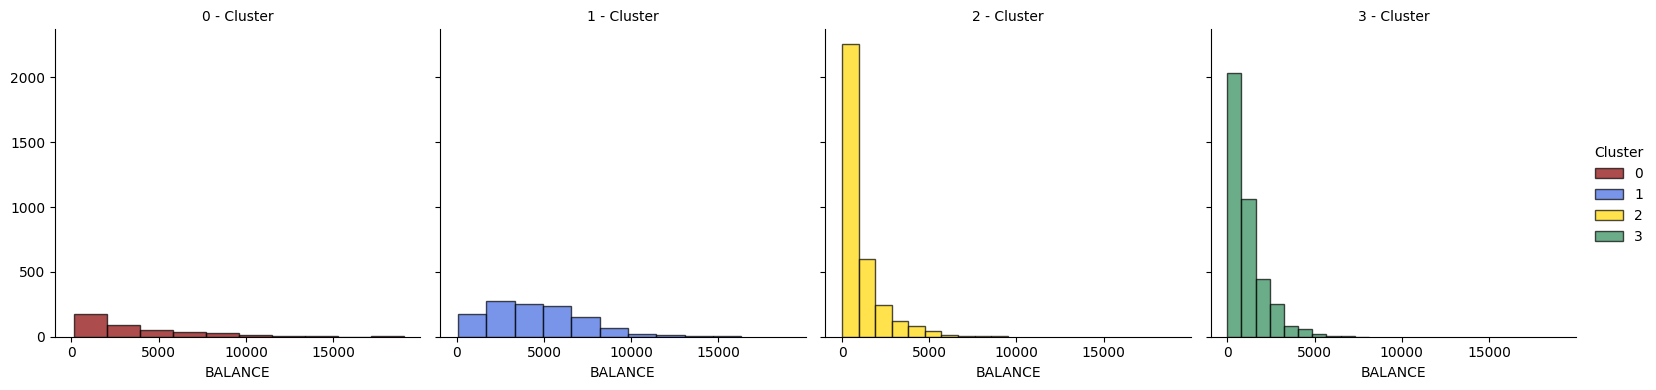

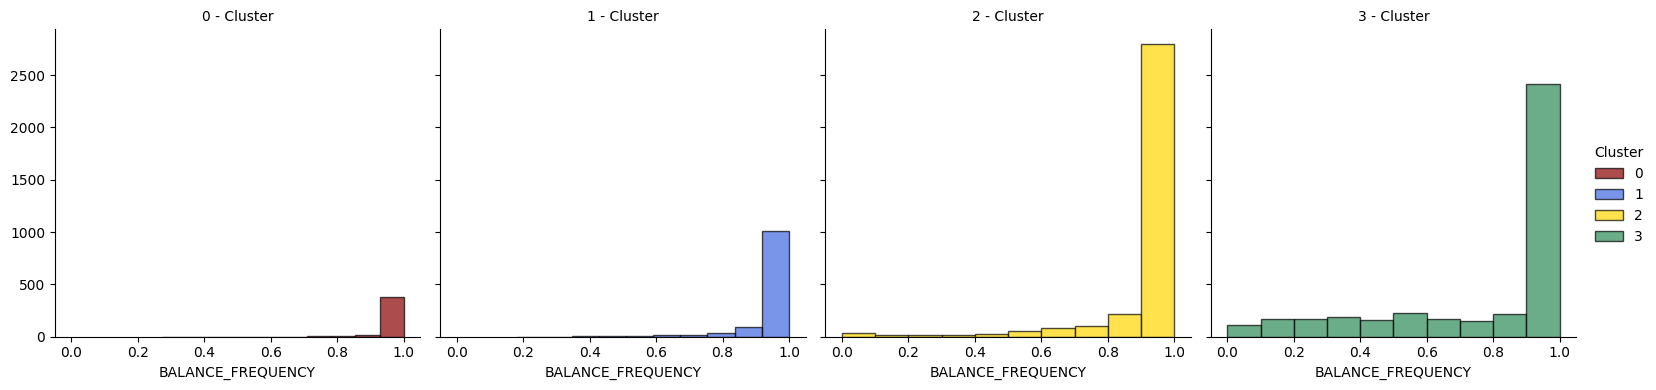

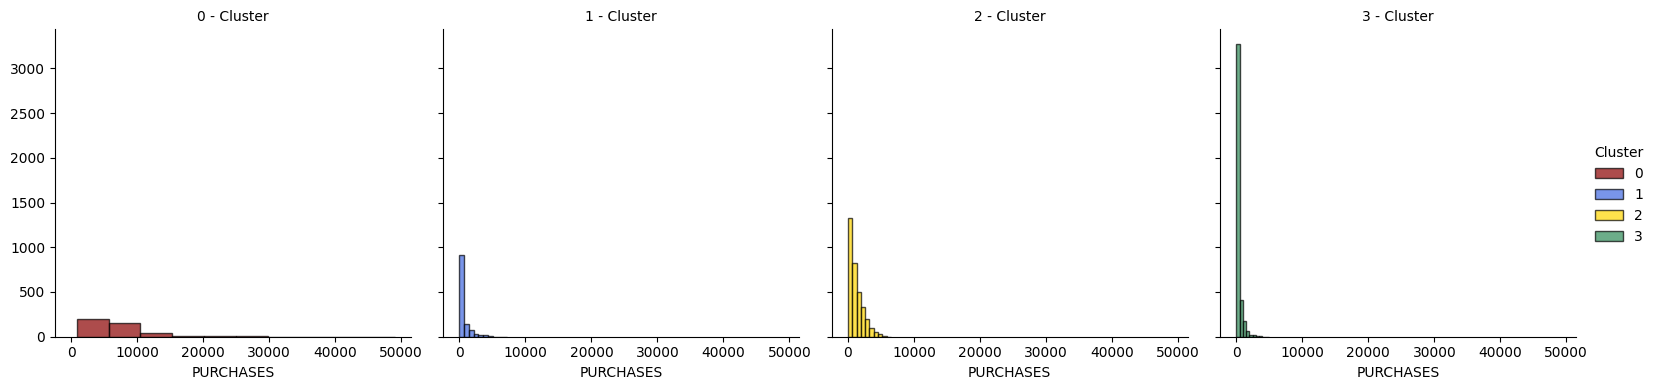

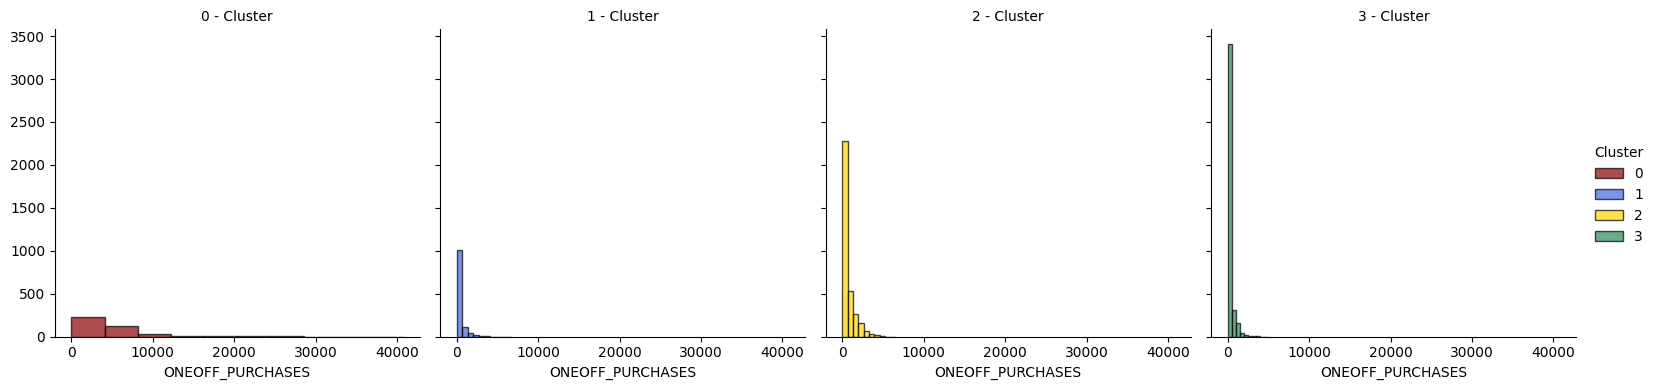

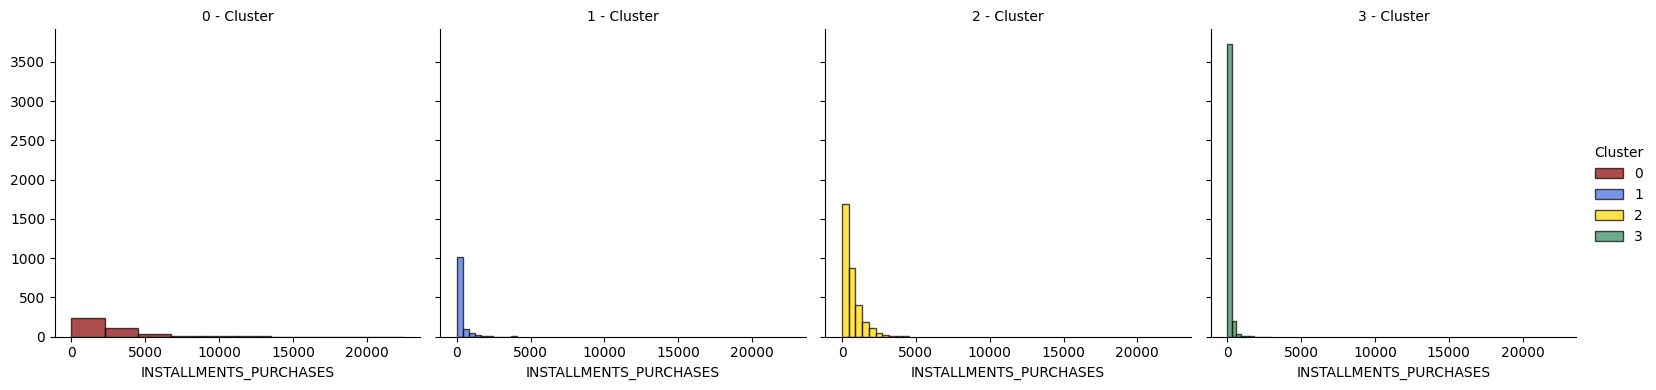

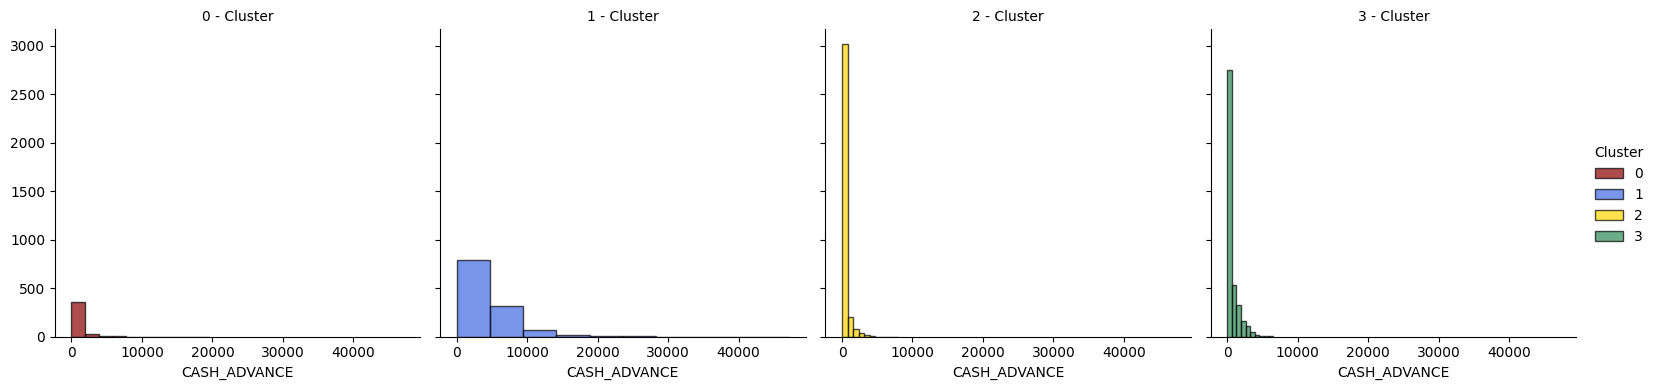

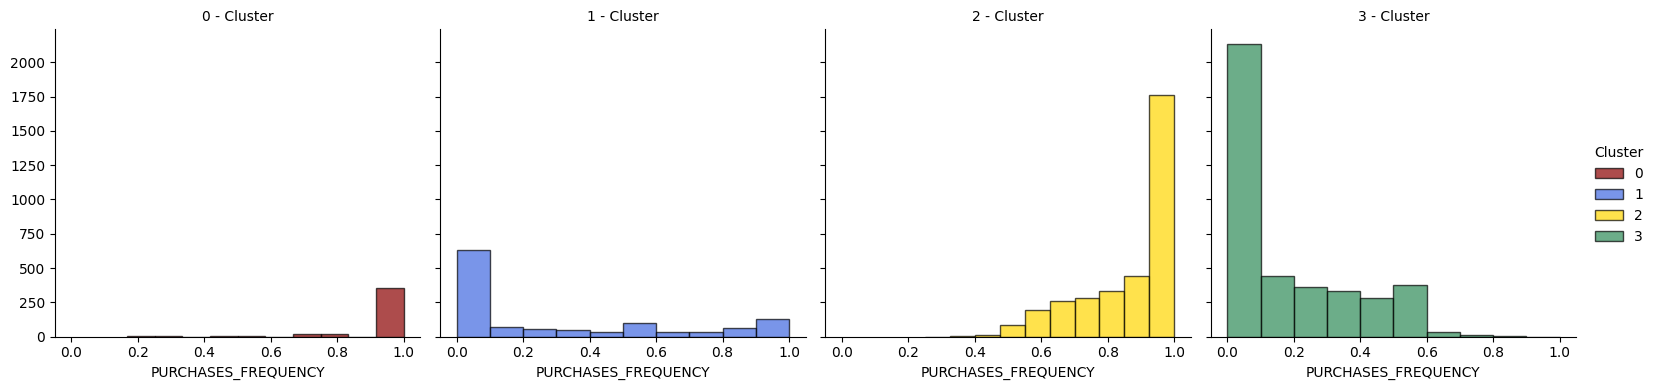

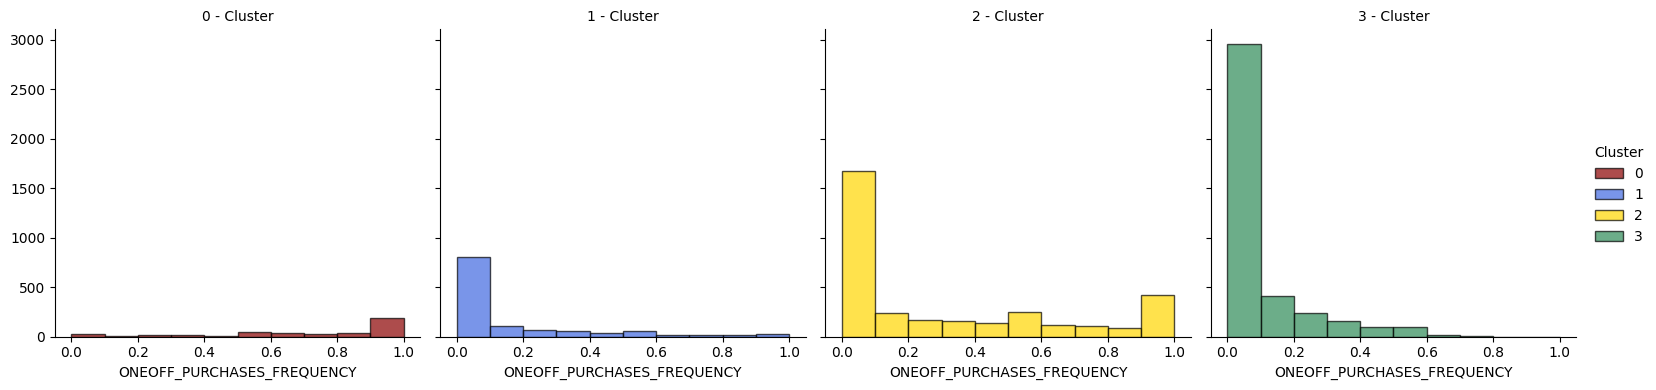

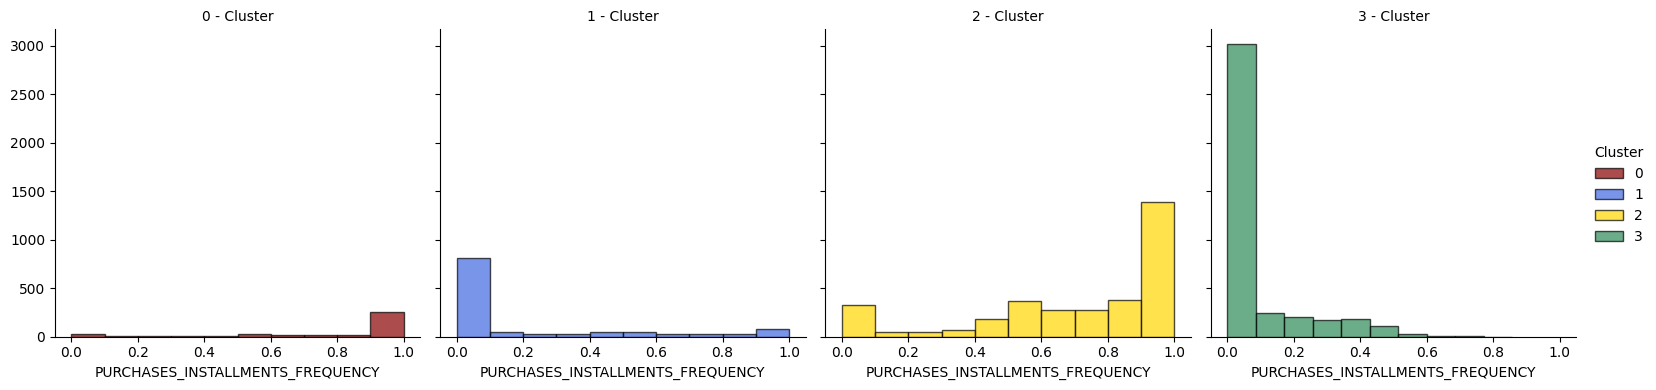

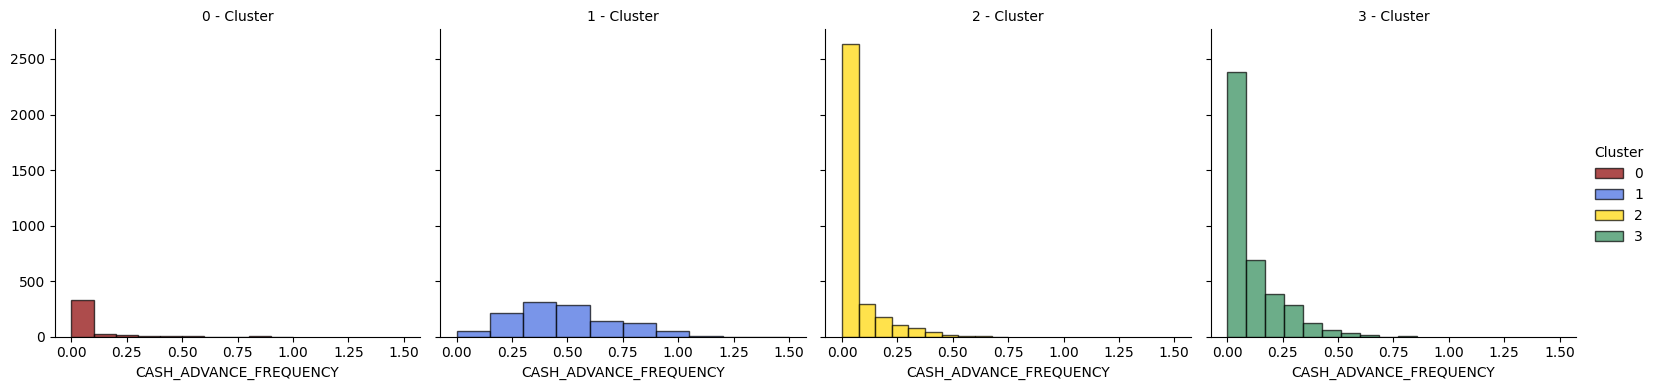

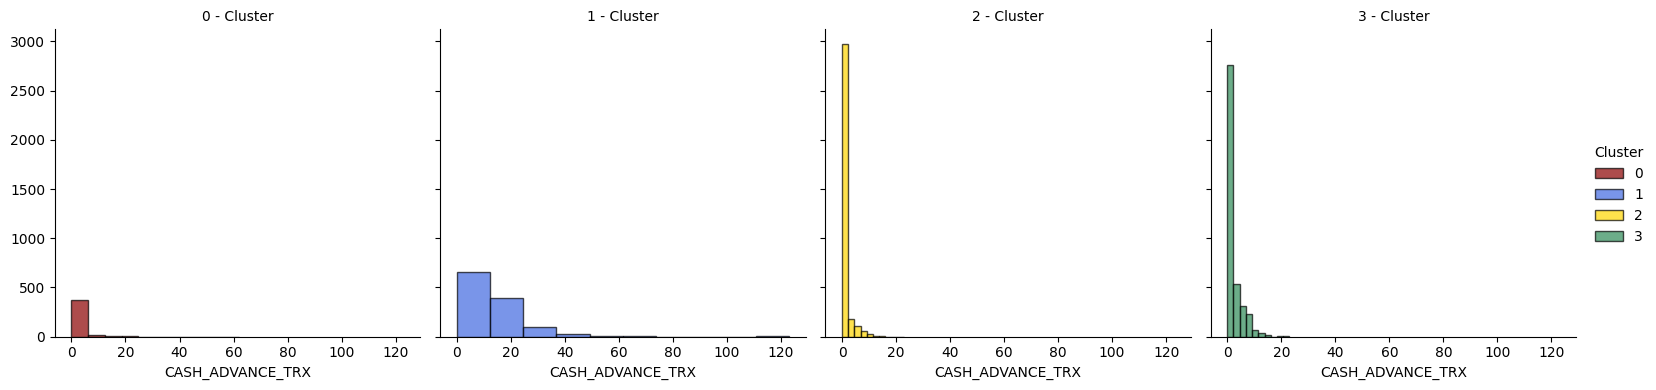

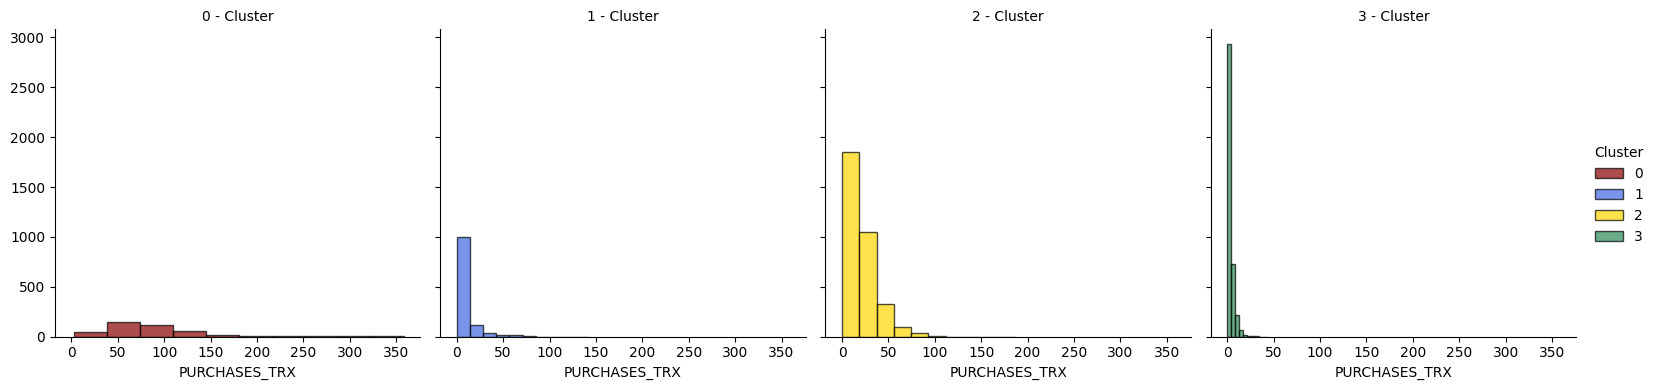

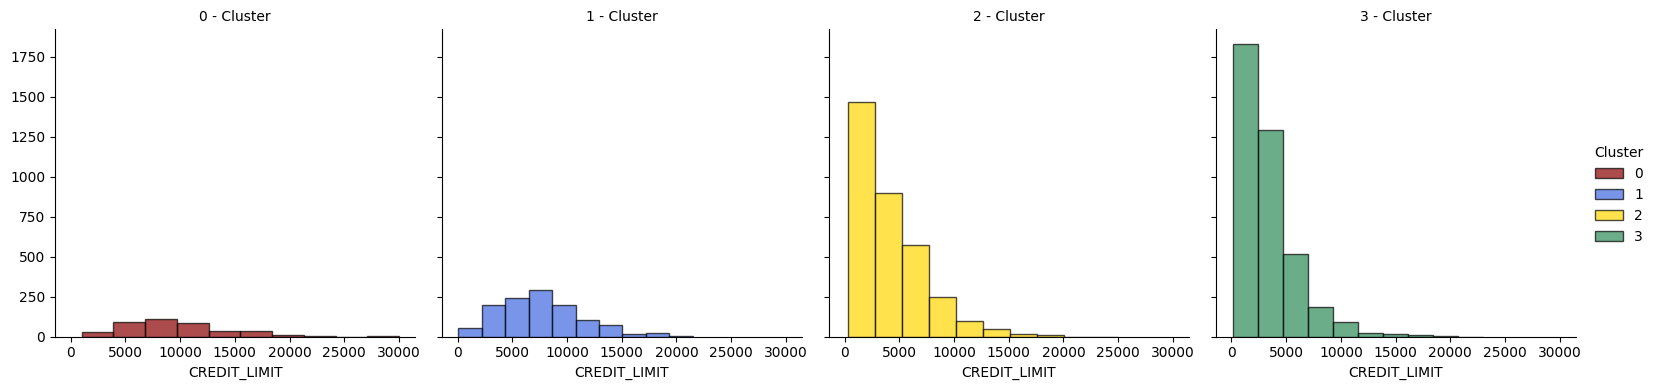

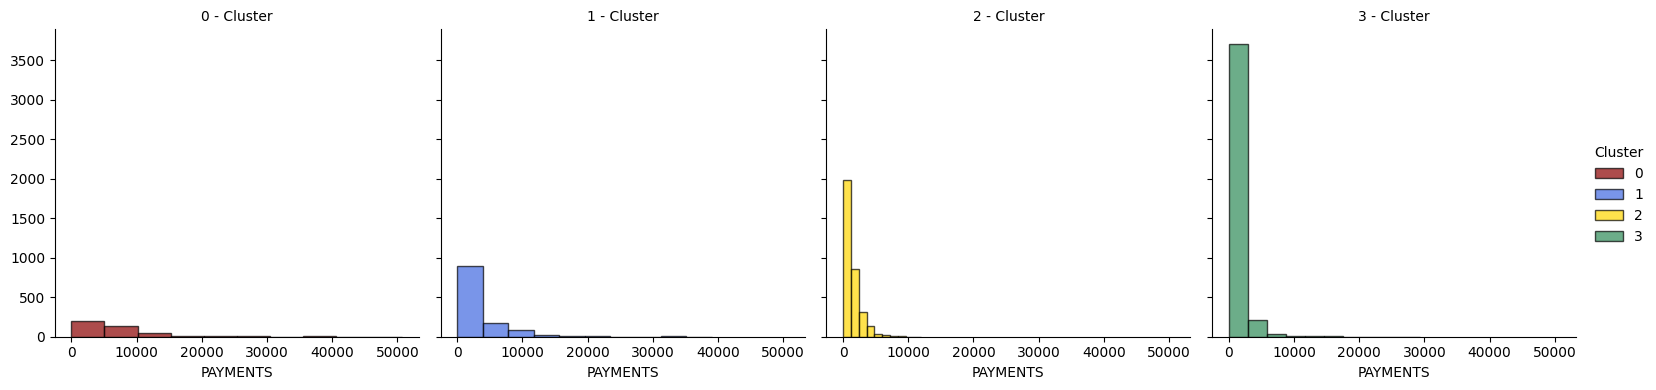

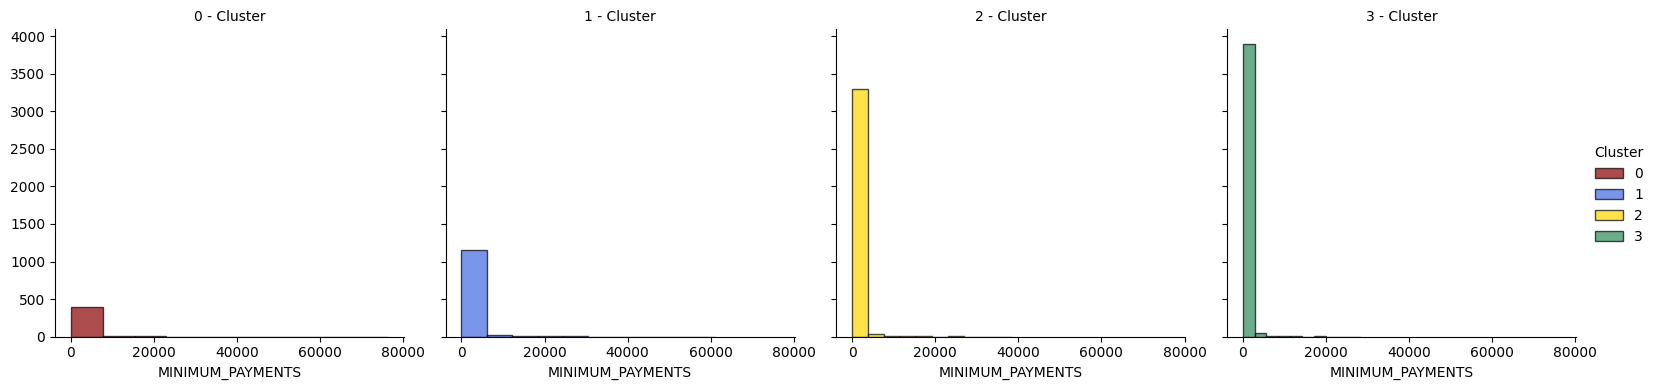

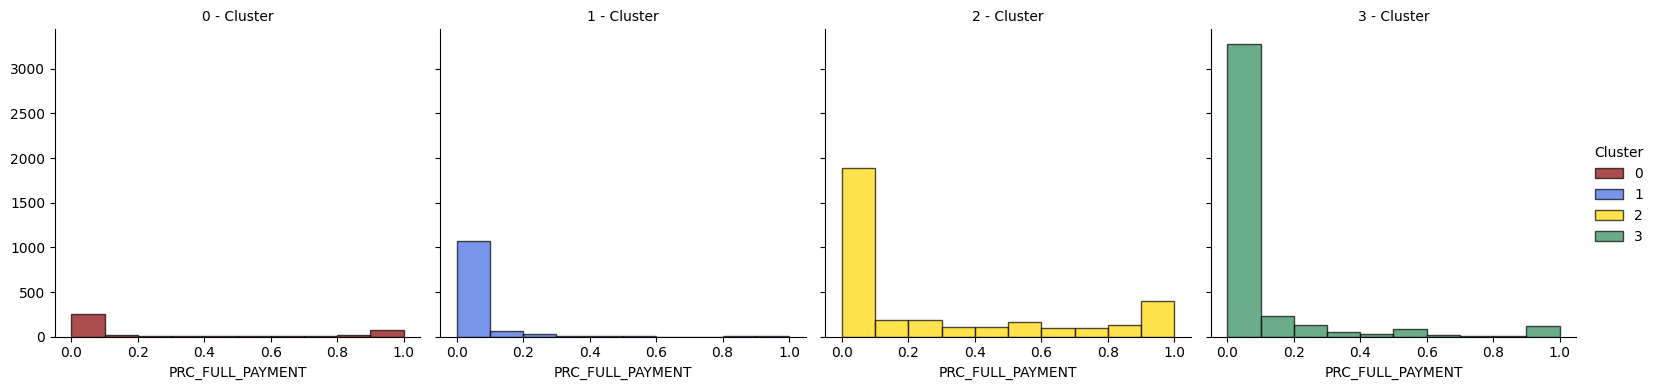

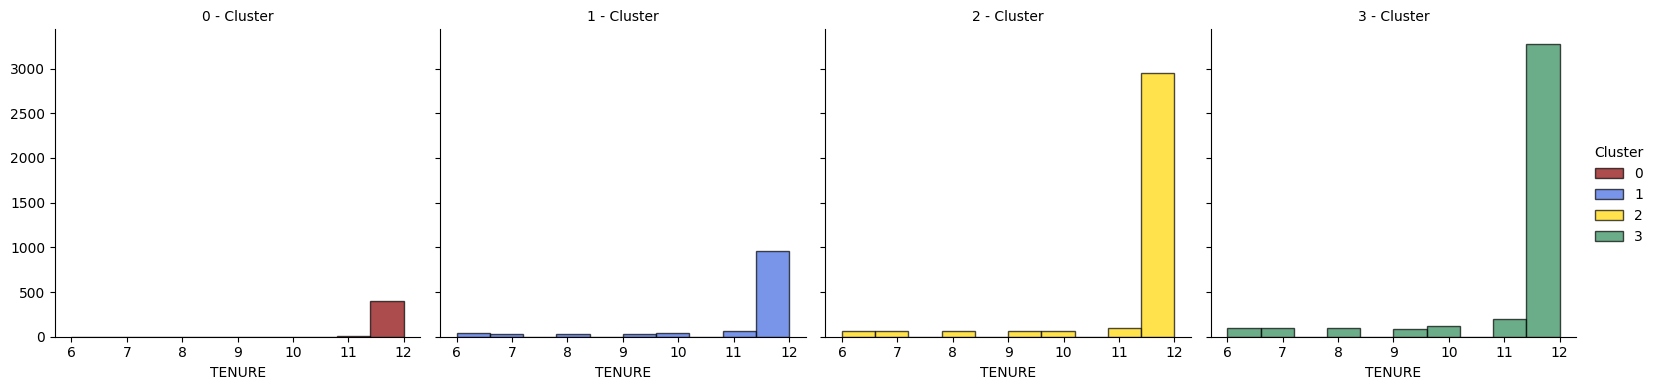

In [44]:
# Colors for each cluster
colors = ['darkred', 'royalblue', 'gold', 'seagreen']

# Loop through each feature (excluding the 'Cluster' column)
for c in cluster_df.drop(['Cluster'], axis=1).columns:
    # Create a FacetGrid colored by each cluster
    grid = sns.FacetGrid(cluster_df, col='Cluster', hue='Cluster', palette=colors, col_wrap=4, height=4)

    # Map a histogram to the FacetGrid for the current feature
    grid.map(plt.hist, c, edgecolor="k", alpha=0.7)

    # Add a legend
    grid.add_legend()

    # Adjust the title of each subplot to include the feature name
    grid.set_titles("{col_name} - {col_var}")

    plt.show()

In [45]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [46]:
cluster_df.to_csv("ClusteredCD.csv")

In [47]:

# Decision Tree Model
# Splitting the dataset
X = cluster_df.drop(['Cluster'], axis=1)
y = cluster_df[['Cluster']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training and Hyperparameter Tuning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [48]:
# Model Evaluation
y_pred = grid_search.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 128    2   15    2]
 [   7  303   12   38]
 [  14   11  992   38]
 [   2   19   23 1079]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       147
           1       0.90      0.84      0.87       360
           2       0.95      0.94      0.95      1055
           3       0.93      0.96      0.95      1123

    accuracy                           0.93      2685
   macro avg       0.91      0.90      0.91      2685
weighted avg       0.93      0.93      0.93      2685



In [49]:
# Additional Metrics
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

F1 Score: 0.9315607249957283
Precision: 0.9318024380891136
Recall: 0.9318435754189944


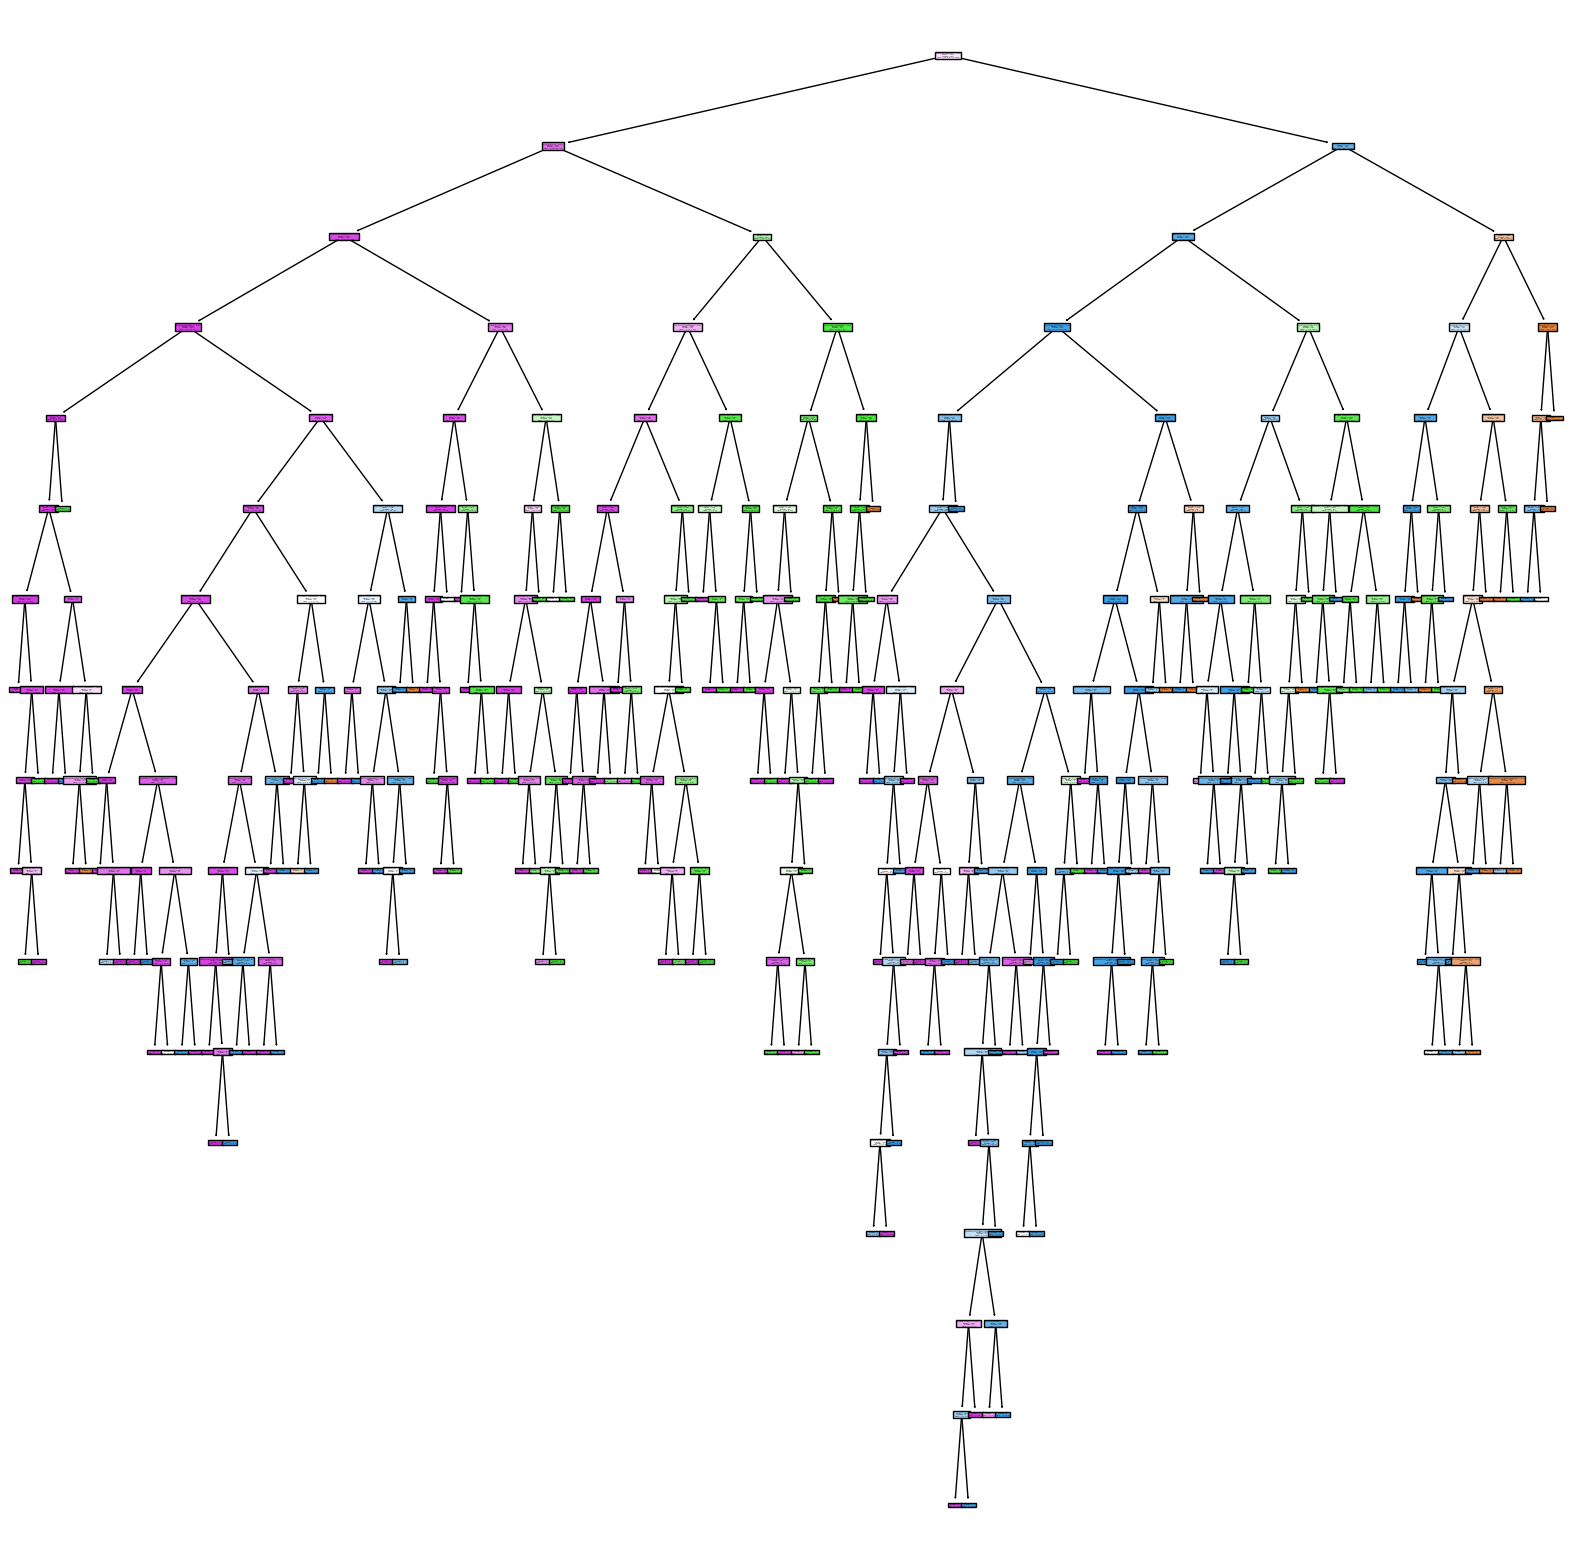

In [50]:
# Model Interpretation
plt.figure(figsize=(20,20))
tree.plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns)
plt.show()

In [51]:
# Feature Importance
importance = grid_search.best_estimator_.feature_importances_
for i, j in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {j}")

Feature: BALANCE, Score: 0.05643688382731049
Feature: BALANCE_FREQUENCY, Score: 0.008595242192106126
Feature: PURCHASES, Score: 0.09465499282980838
Feature: ONEOFF_PURCHASES, Score: 0.0015268968312048263
Feature: INSTALLMENTS_PURCHASES, Score: 0.011980520193287623
Feature: CASH_ADVANCE, Score: 0.18141436552714257
Feature: PURCHASES_FREQUENCY, Score: 0.47739715140804834
Feature: ONEOFF_PURCHASES_FREQUENCY, Score: 0.003414071607924609
Feature: PURCHASES_INSTALLMENTS_FREQUENCY, Score: 0.005558543751506178
Feature: CASH_ADVANCE_FREQUENCY, Score: 0.05047016962425485
Feature: CASH_ADVANCE_TRX, Score: 0.026233565632599348
Feature: PURCHASES_TRX, Score: 0.02877403096140235
Feature: CREDIT_LIMIT, Score: 0.016304838146992507
Feature: PAYMENTS, Score: 0.008158762128650646
Feature: MINIMUM_PAYMENTS, Score: 0.015011481243611671
Feature: PRC_FULL_PAYMENT, Score: 0.01356960739045529
Feature: TENURE, Score: 0.0004988767036942096


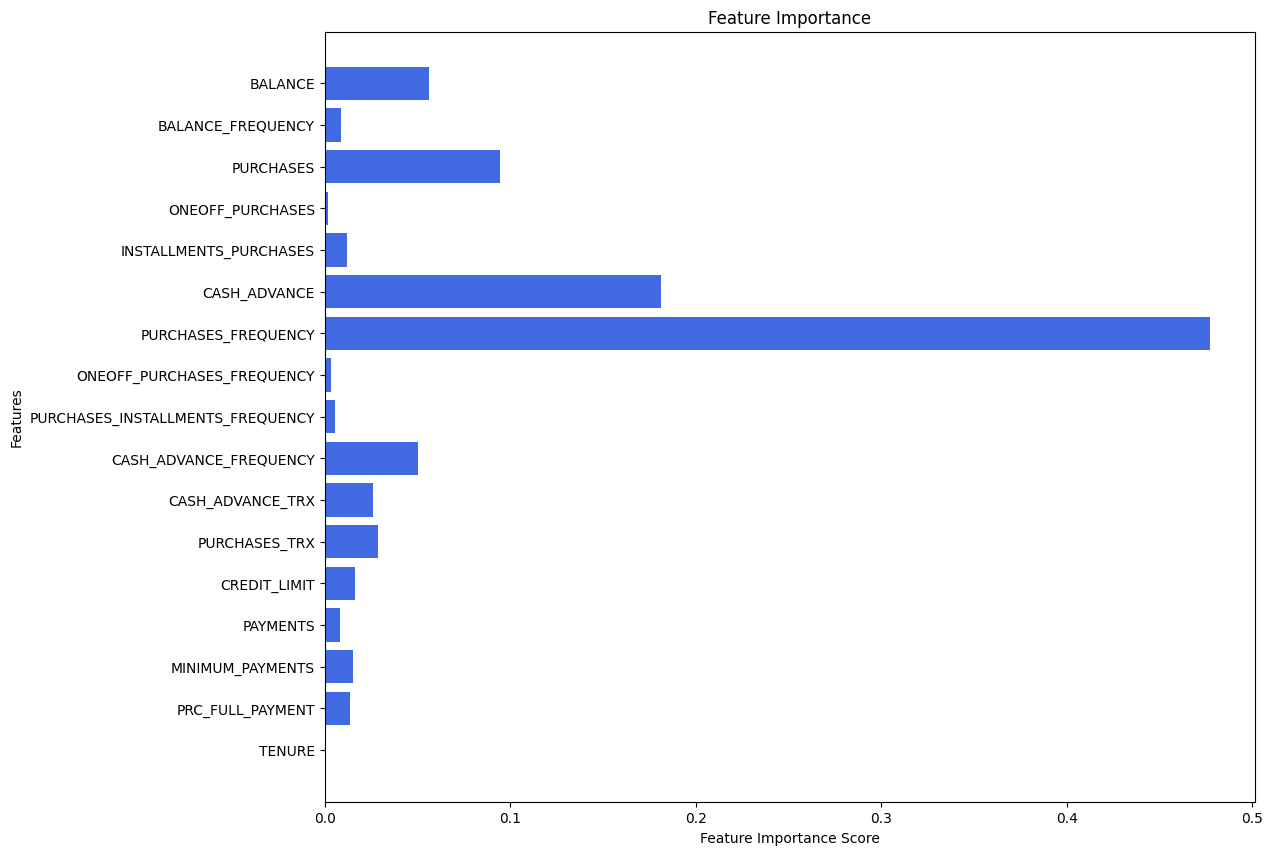

In [52]:
# Features and their importance scores
features = [
    "BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS",
    "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"
]
scores = [
    0.05643688382731049, 0.008595242192106126, 0.09465499282980838, 0.0015268968312048263,
    0.011980520193287623, 0.18141436552714257, 0.47739715140804834, 0.003414071607924609,
    0.005558543751506178, 0.05047016962425485, 0.026233565632599348, 0.02877403096140235,
    0.016304838146992507, 0.008158762128650646, 0.015011481243611671, 0.01356960739045529, 0.0004988767036942096
]

# Create a bar plot
plt.figure(figsize=(12,10))
plt.barh(features, scores, color='royalblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [53]:
# Save the Model
filename = 'finalmodel.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

In [58]:
!zip -r /content/Market_Segmentation.zip /content/Market_Segmentation

  adding: content/Market_Segmentation/ (stored 0%)
  adding: content/Market_Segmentation/finalmodel.sav (deflated 81%)
  adding: content/Market_Segmentation/Customer Data.csv (deflated 62%)
  adding: content/Market_Segmentation/App.py (deflated 67%)
  adding: content/Market_Segmentation/ClusteredCD.csv (deflated 65%)
  adding: content/Market_Segmentation/kmeans_model.pkl (deflated 87%)
